In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import matplotlib as mpl
import matplotlib.pylab as pl

# Paper font style
rc_fonts = {
    'font.family': 'serif',
    'figure.figsize': (10, 6),
    'text.usetex': True,
   # 'text.latex.preview': True,
    'text.latex.preamble': r"\usepackage[cal=euler]{mathalfa} \usepackage{libertine} \usepackage[libertine,smallerops]{newtxmath} \usepackage[T1]{fontenc}"
}

mpl.rcParams.update(rc_fonts)

### Import ode solver class

In [2]:
from ode import ode

### Parameters

In [3]:
d_discr = 2000                     # Numerical discretization to solve ODEs: step = 1. / d_discr 
k = 4                              # Number of teacher hidden units  
p = 8                              # Number of student hidden units 
noise = 1e-3                       # Noise level
t_max = 1e4                        # Maximum t on the respective time scaling
tol = 0                            # Stops if abs(pop_risk_t - pop_risk_{t-1}) <= tol. If zero, stops on alpha_max
save_folder = 'results/ex_ode00/'  # Folder to save
gamma_0 = p                        # Gamma zero

#### Option 1: Matrices ${\bf Q}^0$, ${\bf M}^0$ and ${\bf P}$ generated inside `ode` class before solving the ODEs

In [4]:
kappa = 0                  # Hidden layer exponent 
delta = 0                  # Learning rate exponent

odes = ode(d_discr,p,k)    # Initialize the class

Q0 = odes.set_Q0()         # Gaussian uninformed initialization
M0 = odes.set_M0()         # Gaussian random teacher
P = odes.set_P()           # Sets P based on previous choices

t0, eg0 = odes.fit(t_max= t_max, delta=delta, kappa=kappa, gamma_0=gamma_0, noise= noise, tol= tol, save_folder= save_folder)

BLUE line: kappa + delta = 0
 
time scaling:  d1.0000
Initial conditions:
Q0 externally informed: False
M0 externally informed: False
Teacher:
P externally informed: False
Committees normalized with 1/n and 1/k
Teacher with additive output noise: y_t = f + sqrt(noise)*xi ; noise= 1e-03
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 0, t= 0e+00, eg= 0.0612152926, time= 0.00
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 2000, t= 1e+00, eg= 0.0374764319, time= 0.21
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 4000, t= 2e+00, eg= 0.0234154435, time= 0.20
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 6000, t= 3e+00, eg= 0.0151774653, time= 0.20
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 8000, t= 4e+00, eg= 0.0103473784, time= 0.20
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 10000, t= 5e+00, eg= 0.0075004966, time= 0.19
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 1200

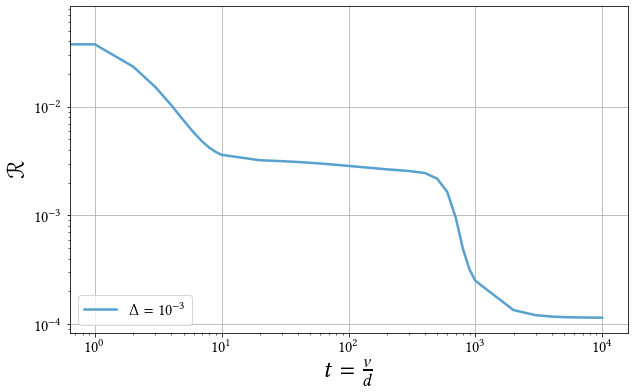

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

lines =10
colors = pl.cm.Blues_r(np.linspace(0,1,lines))
col0=0

ax.plot(t0, eg0, color=colors[col0+4], ls='-', label= '$\Delta= 10^{-3}$', lw=2.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$t = \frac{\nu}{d}$', fontsize= 25)
ax.set_ylabel(r'${\cal R}$', fontsize= 25)
ax.legend(fontsize=16, loc=3)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True)
plt.show()

In [ ]:
kappa = 0                  # Hidden layer exponent 
delta = 0.5                # Learning rate exponent

odes = ode(d_discr,p,k)    # Initialize the class

Q0 = odes.set_Q0()         # Gaussian uninformed initialization
M0 = odes.set_M0()         # Gaussian random teacher
P = odes.set_P()           # Sets P based on previous choices

t1, eg1 = odes.fit(t_max= t_max, delta=delta, kappa=kappa, gamma_0= gamma_0, noise= noise, tol= tol, save_folder= save_folder)

GREEN region: kappa + delta > 0
 
time scaling:  d1.5000
Initial conditions:
Q0 externally informed: False
M0 externally informed: False
Teacher:
P externally informed: False
Committees normalized with 1/n and 1/k
Teacher with additive output noise: y_t = f + sqrt(noise)*xi ; noise= 1e-03
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 0, t= 0e+00, eg= 0.0621333588, time= 0.00
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 89442, t= 1e+00, eg= 0.0341951577, time= 1.00
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 178885, t= 2e+00, eg= 0.0192262631, time= 1.09
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 268328, t= 3e+00, eg= 0.0114465197, time= 1.59
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 357770, t= 4e+00, eg= 0.0073914897, time= 1.07
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03  -- j= 447213, t= 5e+00, eg= 0.0052453016, time= 0.98
ddiscr= 2000, k= 4, p= 8, gamma_0= 8.0000, noise= 1e-03 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

lines =10
colors = pl.cm.Greens_r(np.linspace(0,1,lines))
col0=0

ax.plot(t1, eg1, color=colors[col0+4],ls='-', label= '$\Delta= 10^{-3}$', lw=2.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$t = \frac{\nu}{d}$', fontsize= 25)
ax.set_ylabel(r'${\cal R}$', fontsize= 25)
ax.legend(fontsize=16, loc=3)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True)
plt.show()

#### Option 2: External input for ${\bf Q}^0$, ${\bf M}^0$ and ${\bf P}$ 

In [ ]:
kappa = 0                  # Hidden layer exponent 
delta = 0.5                # Learning rate exponent

odes = ode(d_discr,p,k)    # Initialize the class


'''Load W0 and Wt to construct the respectives Q0, M0 and P'''
d_init = 100
id_ = 'Wt_W0_d%d_p%s_k%s_sit01.npz' % (d_init,'{:03}'.format(p),'{:03}'.format(k))
file_path_id = '../sim/Wt_W0'
file_path = file_path_id_ + '/' + id_
data = np.load(file_path)

W0 = data['W0']
Wt = data['Wt']
Q0 = W0 @ W0.T / d_init
M0 = W0 @ Wt.T / d_init
P = Wt @ Wt.T / d_init


odes.set_Q0(Q0)         # Externally informed Q0
odes.set_M0(M0)         # Gaussian random teacher
odes.set_P(P)           # Sets P based on previous choices

t2, eg2 = odes.fit(t_max= t_max, delta=delta, kappa=kappa, gamma_0= gamma_0, noise= noise, tol= tol, save_folder= save_folder)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

lines =10
colors = pl.cm.Greens_r(np.linspace(0,1,lines))
col0=0

ax.plot(t2, eg2, color=colors[col0+4], marker='^', ls='', label= '$\Delta= 10^{-3}$', ms = 8, mew = 2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$t = \frac{\nu}{d}$', fontsize= 25)
ax.set_ylabel(r'${\cal R}$', fontsize= 25)
ax.legend(fontsize=16, loc=3)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True)
plt.show()

In [15]:
kappa = 0                                                          # Hidden layer exponent 
delta = 0                                                          # Learning rate exponent

odes = ode(d_discr,p,k)    # Initialize the class


'''Load W0 and Wt to construct the respectives Q0, M0 and P'''
d_init = 100
id_ = 'Wt_W0_d%d_p%s_k%s_sit01.npz' % (d_init,'{:03}'.format(p),'{:03}'.format(k))
file_path_id = '../sim/Wt_W0'
file_path = file_path_id_ + '/' + id_
data = np.load(file_path)

W0 = data['W0']
Wt = data['Wt']
Q0 = W0 @ W0.T / d_init
M0 = W0 @ Wt.T / d_init
P = Wt @ Wt.T / d_init


odes.set_Q0(Q0)         # Externally informed Q0
odes.set_M0(M0)         # Gaussian random teacher
odes.set_P(P)           # Sets P based on previous choices

t3, eg3 = odes.fit(t_max= t_max, delta=delta, kappa=kappa, gamma_0= gamma_0, noise= noise, tol= tol, save_folder= save_folder)

BLUE line: kappa + delta = 0
alpha_scale:  d1.0000
Committees normalized with 1/n and 1/k
Wt orthogonal
W0 linear combination of Wt
Teacher with additive output noise: y_t = f + sqrt(noise)*xi ; noise= 1e-03
d= 100, k= 4, n= 8, eta= 8.000, noise= 1e-03 -- j= 0, alpha= 0e+00, eg= 0.0772056003, time= 0.00
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 100, alpha = 1e+00, eg = 0.0496956034, time = 36.63
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 200, alpha = 2e+00, eg = 0.0310340415, time = 0.33
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 300, alpha = 3e+00, eg = 0.0188059780, time = 0.35
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 400, alpha = 4e+00, eg = 0.0132794173, time = 0.34
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 500, alpha = 5e+00, eg = 0.0097431033, time = 0.38
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- j = 600, alpha = 6e+00, eg = 0.0064296986, time = 0.33
d = 100, k = 4, n = 8, eta = 8.000, noise= 1e-03 -- 

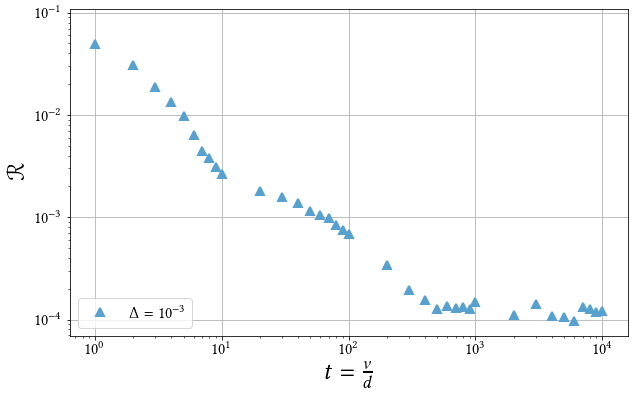

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

lines =10
colors = pl.cm.Blues_r(np.linspace(0,1,lines))
col0=0

ax.plot(t3, eg3, color=colors[col0+4], marker='', label= '$\Delta= 10^{-3}$', lw= 2.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$t = \frac{\nu}{d}$', fontsize= 25)
ax.set_ylabel(r'${\cal R}$', fontsize= 25)
ax.legend(fontsize=16, loc=3)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True)
plt.show()